In [43]:
using Plots
using LaTeXStrings

### Integración: Divide y Conquista! 

#### Reglas Compuestas.

Cuando tenemos un intervalo de integración podemos dividir el mismo en intervalos menores y usar las reglas aprendidas (Punto Medio, Trapecio y Simpson) en cada una de ellas y sumar.

Consideremos un intervalo $[a,b]$ dividido en $N-1$ intervalos iguales de longitud $dx = (b-a)/(N-1)$, es decir donde los puntos de cada uno de ellos vienen dados por:

$$
x_i = a + dx(i-1)
$$

Supondremos que tenemos los valores de una función en dichos puntos, $y_i = f(x_i)$.

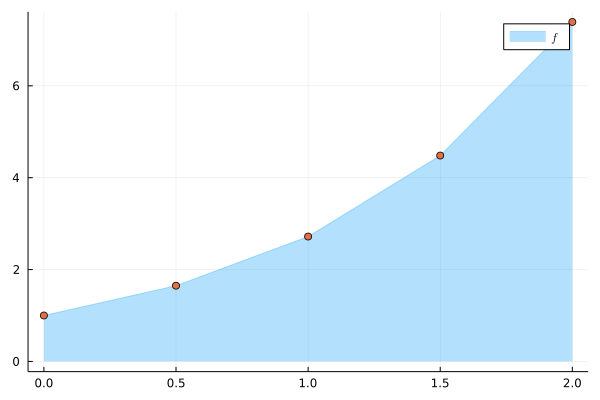

In [44]:
a = 0
b = 2
N = 5
dx = (b-a)/(N-1)
x = [a + dx*(i-1) for i in 1:N]

f(x) = exp(x)

plot(x,f,label=L"f",fillrange = 0, alpha=0.3)
scatter!(x,f,ns=5, label="")

La fórmula que me quedará será entonces:

$$
I_T(f)[a,b]_5 = I_T(f)[a,a+dx] + I_T(f)[a+dx,a+2dx] + I_T(f)[a+2dx,a+3dx] + I_T(f)[a+3dx,a+b]
$$

$$
I_T(f)[a,b]_5 = [\frac{f(a) + f(a+dx)}{2} + \frac{f(a+dx) + f(a+2dx)}{2}  + \frac{f(a+2dx) + f(a+3dx)}{2}  + \frac{f(a+3dx) + f(b)}{2}]dx
$$


$$
I_T(f)[a,b]_5 = [\frac{1}{2}f(a) + f(a+dx) + f(a+2dx)  + f(a+3dx) + \frac{f(b)}{2}]dx
$$

En general tendremos:

$$
I_T(f)[a,b]_N = [\frac{1}{2}(f(a)+f(b)) + \sum_{i=2}^{N-1} f(a+dx*(i-1))]*dx
$$

$$
I_T(f)[a,b]_N = [\frac{1}{2}(f(a)+f(b)) + \sum_{i=2}^{N-1} f(x_i)]*dx
$$

#### Ejemplo:

$$
I_e = \int_0^2 e^x\; dx = 6.38905609893065
$$

$$
I_T(e)[0,2]_5 = [(e^0 + e^2)/2 + e^{0.5} + e^{1} + e^{1.5}]\frac{2}{4}
$$

In [37]:
println("I_T = [($(exp(0)) + $(exp(2)))/2 + $(exp(0.5)) + $(exp(1)) + $(exp(1.5)))/2") 
I_T = (((exp(0) + exp(2))/2 + (exp(0.5)) + (exp(1)) + (exp(1.5)))/2)
println("I_T = $(I_T)") 

I_T = [(1.0 + 7.38905609893065)/2 + 1.6487212707001282 + 2.718281828459045 + 4.4816890703380645)/2
I_T = 6.521610109481282


In [38]:
I_e = 6.38905609893065
I_e - I_T 

-0.13255401055063132

In [46]:
N = 9
a = 0
b = 2
dx = (b-a)/(N-1)
x = [a + dx*(i-1) for i in 1:N]
y = exp.(x)

I_T_9 = (sum(y) - (y[1]+y[N])/2)*dx

6.422297821432638

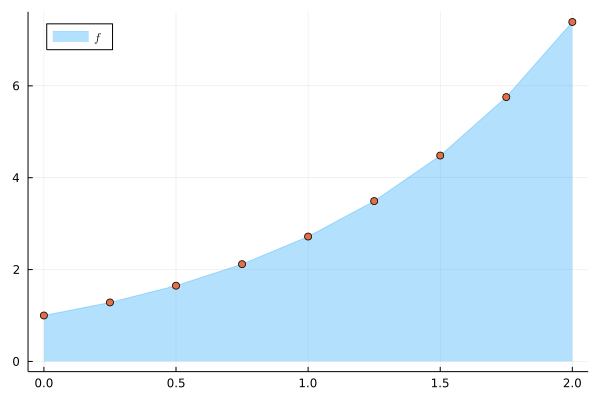

In [48]:
plot(x,y,label=L"f",fillrange = 0, alpha=0.3, legend=:topleft)
scatter!(x,y,ns=5, label="")

### Estimación del error

Recordemos que el error de cada término era de:

$$
Error_T(f)[x,x+dx] = C_2 \frac{dx^3}{12} \;\;\;\;\;\; 
$$

$$
C_2 = \max_{\zeta \in [x,x+dx]}\{|f^{''}(\zeta)|\}
$$

Como estaremos sumando $N-1$ términos, los errores se suman en valor absoluto para la cota y por ende tenemos:

$$
Error_T(f)[a,b] = C_2 \frac{dx^3}{12}(N-1) = C_2 \frac{dx^2}{12}(b-a)
$$

Donde ahora,

$$
C_2 = \max_{\zeta \in [a,b]}\{|f^{''}(\zeta)|\}
$$

**El error decrece cuadráticamente con $dx$ o sea con $\frac{1}{N-1}$**

### Regla de Simpson

En la regla de Simpson tendremos igualmente (tomando de a dos puntos):

$$
I_S(f)[a,b]_5 = I_S(f)[a,a+2dx] + I_S(f)[a+2dx,b]
$$

$$
I_S(f)[a,b]_5 = [(f(a) + f(a+2dx) + 4 f(a+dx)]\frac{2dx}{6} + (f(a+2dx) + f(b) + 4 f(a+3dx)]\frac{2dx}{6}
$$

$$
I_S(f)[a,b]_5 = [(f(a) + 4 f(a+dx) + 2f(a+2dx) + 4 f(a+3dx) + f(b)]\frac{dx}{3}
$$

#### Ejemplo: 

$$
I_e = \int_0^2 e^x\; dx = 6.38905609893065
$$

$$
I_S(e)[0,2]_5 = [e^0 + e^2 + 4e^{0.5} + 2e^{1} + 4e^{1.5}]\frac{0.5}{3}
$$

In [41]:
println("I_S = [$(exp(0)) + $(exp(2)) + $(4*exp(0.5)) + $(2*exp(1)) + $(4*exp(1.5)))0.5/3") 
I_S = (exp(0) + exp(2) + 4*exp(0.5) + 2*exp(1) + 4*exp(1.5))/6
println("I_S = $(I_S)") 

I_S = [1.0 + 7.38905609893065 + 6.594885082800513 + 5.43656365691809 + 17.926756281352258)0.5/3
I_S = 6.391210186666918


In [42]:
I_e = 6.38905609893065
I_e - I_S

-0.0021540877362680177

Con $N=3$ teníamos $-0.031$.

**Notemos que necesitamos un numero impar de puntos**

La expresión para un número de puntos arbitrarios $\{x_i\}\;\; i = 1\ldots N$, es



$$
I^N_S(f)[a,b] = [f(a) + f(b) + 4 \sum_{i=1}^{\frac{N-1}{2}} f(x_{2i}) + 2\sum_{i=1}^{\frac{N-3}{2}}f(x_{2i+1})]\frac{dx}{3} \;\;\;\;\; dx = \frac{b-a}{N-1}
$$

Recordando que si nos dan in conjunto de valores $\{y_i\}\;\; i = 1\ldots N$ debemos subsituir $f(x_i) \to y_i$.

El error total de la integración será entonces la suma de los errores de cada tramo de integración y por lo tanto vendrá dado por (recordando que usamos 2 intervalos por cada aplicación, o sea tenemos $(N-1)/2$ aplicaciones):

$$
Error^N_S(f)[a,b] = \frac{N-1}{2}Error_S(f)[x,x+2dx] =  \frac{N-1}{2}C_4 \frac{(2dx)^5}{2880}
                  = C_4 \frac{(2dx)^4}{2880}(b-a) = C_4 \frac{dx^4}{180}(b-a)
                  $$

Donde,
$$
C_4 = \max_{\zeta \in [a,b]}\{|f^{iv}(\zeta)|\}.
$$


Vemos entonces que el error disminuye orden $dx^4$, lo cual hace que este método sea muy útil y económico. 